1. **share-population-female.csv**: [Gender Ratio - Our World in Data](https://ourworldindata.org/gender-ratio)

| column name |   Entity   |    Code    |   Year    | Population, female (% of total population) |
| :---------: | :--------: | :--------: | :-------: | :----------------------------------------: |
|  **dtype**  | **object** | **object** | **int64** |                **float64**                 |

Gender ratio of  the total population comes from "share-population-female.csv". The file is accurate, only **Code** column exists null values because **Entity** includes "world", "continent", and some regions which do not have unique code.

2. **sex-ratio-at-birth-vs-five-years-old.csv** : [Gender Ratio - Our World in Data](https://ourworldindata.org/gender-ratio)

   | column name | Entity     | Code       | Year      | Sex ratio - Sex: none - Age: at birth - Variant: estimates | Sex ratio - Sex: none - Age: 5 - Variant: estimates | Continent  |
   | ----------- | ---------- | ---------- | --------- | ---------------------------------------------------------- | --------------------------------------------------- | ---------- |
   | **dtype**   | **object** | **object** | **int64** | **float64**                                                | **float64**                                         | **object** |

   Sex ratio at birth and five years old comes from "sex-ratio-at-birth-vs-five-years-old.csv". The file is accurate, although **two columns of sex ratio** have null values. These values from some small or island countries, when I connect all gender ratio files I will filter them.  Meanwhile, **Code** and **Continent** with null value because **Entity** includes "world" and every **Entity** is only assigned **Continent** once in any **Year**.

3. **sex-ratio-by-age.csv** :  [Gender Ratio - Our World in Data](https://ourworldindata.org/gender-ratio)

| column name                                                | dtype       |
| ---------------------------------------------------------- | ----------- |
| **Entity**                                                 | **object**  |
| **Code**                                                   | **object**  |
| **Year**                                                   | **int64**   |
| **Sex ratio - Sex: none - Age: 100+ - Variant: estimates** | **float64** |
| **Sex ratio - Sex: none - Age: 15 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 20 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 30 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 40 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 50 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 60 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 70 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 80 - Variant: estimates**   | **float64** |
| **Sex ratio - Sex: none - Age: 90 - Variant: estimates**   | **float64** |

Sex ratio from 15 to over 100 years old comes from  "sex-ratio-by-age.csv". The file is accurate, except **Code**,  **Sex ratio at some age groups** have null values, but they are concentrated in the upper age group. I think it is not unusual because it doesn't have to be missing data, it can also be life expectancy is not enough.

There are three file as fundamental data to analyze effects of **education, GDP(Gross Domestic Product), and substances(tobacco, alcohol, and drugs)** on gender ratio of countries.

4. **substances-risk-factor-vs-direct-deaths.csv** : [Drug Use - Our World in Data](https://ourworldindata.org/drug-use)

   | column name                                                  | dtype      |
   | ------------------------------------------------------------ | ---------- |
   | **Entity**                                                   | **object** |
   | **Code**                                                     | **object** |
   | **Year**                                                     | **int64**  |
   | **Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)** | **int64**  |
   | **Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)** | **int64**  |
   | **Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number)** | **int64**  |
   | **Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)** | **int64**  |
   | **Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)** | **int64**  |

   The deaths of each country in each year, from 1990 to 2019, because of substances come from "substances-risk-factor-vs-direct-deaths.csv". The file is accurate, except **Code**, there is no null value. And **Drug use disorders** and **Alcohol use disorders** mean their negative influence on health for a long period, not a sudden death.

In [3]:
# Import needed library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Use pandas to read the CSV files.
SHARE_POPULATION_FEMALE = pd.read_csv(r"share-population-female.csv")
SEX_RATIO_BIRTH_FIVE    = pd.read_csv(r"sex-ratio-at-birth-vs-five-years-old.csv")
SEX_RATIO_BY_AGE        = pd.read_csv(r"sex-ratio-by-age.csv")

In [5]:
# The column names of  initial data set are very complicated.
# Thus, these names should be renamed.
left_name  = "Sex ratio - Sex: none - "
right_name = " - Variant: estimates"

SEX_RATIO_BIRTH_FIVE.rename(columns = {left_name+"Age: at birth"+right_name : "Age: at birth",
                                       left_name+"Age: 5"+right_name:"Age: 5"},inplace=True)

SEX_RATIO_BY_AGE.rename(columns = {left_name+"Age: 100+"+right_name : "Age: 100+",
                                   left_name+"Age: 15"+right_name:"Age: 15",
                                   left_name+"Age: 20"+right_name:"Age: 20",
                                   left_name+"Age: 30"+right_name:"Age: 30",
                                   left_name+"Age: 40"+right_name:"Age: 40",
                                   left_name+"Age: 50"+right_name:"Age: 50",
                                   left_name+"Age: 60"+right_name:"Age: 60",
                                   left_name+"Age: 70"+right_name:"Age: 70",
                                   left_name+"Age: 80"+right_name:"Age: 80",
                                   left_name+"Age: 90"+right_name:"Age: 90",},inplace=True)

In the gender ratio of  the total population data set, the file provides the percentage of the female ratio per 100 people. The format is different from other data set so data formats should be unified.

In [6]:
SHARE_POPULATION_FEMALE["Total Gender Ratio"]=SHARE_POPULATION_FEMALE["Population, female (% of total population)"].map(lambda x : 100/((x/100)/(1-x/100)))

Connect three gender ratio data set and delete useless columns.

In [7]:
GENDER_RATIO_AGE = pd.merge(SEX_RATIO_BIRTH_FIVE,SEX_RATIO_BY_AGE[["Entity","Year","Age: 100+","Age: 15","Age: 20","Age: 30","Age: 40","Age: 50","Age: 60","Age: 70","Age: 80","Age: 90"]],on =["Entity","Year"],how = "inner" )

In [8]:
GENDER_RATIO  = pd.merge(SHARE_POPULATION_FEMALE,GENDER_RATIO_AGE,on=["Entity","Year"],how="inner")

In [9]:
GENDER_RATIO.drop(columns=["Population, female (% of total population)","Code_x","Code_y","Continent"],inplace=True)

Resort columns order by ascending age, but the **Total Gender Ratio** before all ages.

In [10]:
columns_order = ["Entity","Year","Total Gender Ratio","Age: at birth","Age: 5",
                "Age: 15","Age: 20","Age: 30","Age: 40","Age: 50","Age: 60","Age: 70",
                "Age: 80","Age: 90","Age: 100+"]
GENDER_RATIO = GENDER_RATIO[columns_order]
GENDER_RATIO

,Entity,Year,Total Gender Ratio,Age: at birth,Age: 5,Age: 15,Age: 20,Age: 30,Age: 40,Age: 50,Age: 60,Age: 70,Age: 80,Age: 90,Age: 100+
0,Afghanistan,1960,106.950801,104.9,101.82,104.42,109.78,115.81,117.53,113.15,114.86,118.49,113.85,100.00,NaN
1,Afghanistan,1961,106.557416,104.9,101.93,102.43,109.22,114.63,117.32,113.18,114.54,117.70,112.73,98.68,NaN
2,Afghanistan,1962,106.188178,104.9,102.03,100.13,108.45,113.43,116.95,113.33,114.41,117.09,111.50,96.30,NaN
3,Afghanistan,1963,105.842318,104.9,102.13,97.48,107.66,112.39,116.81,113.40,113.69,115.97,110.21,96.51,NaN
4,Afghanistan,1964,105.519704,104.9,102.19,97.58,106.58,111.85,117.03,113.20,111.97,113.90,109.06,94.62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11820,Zimbabwe,2016,90.729831,102.1,99.49,95.24,90.16,75.32,82.67,79.35,72.58,74.26,67.61,46.78,31.55
11821,Zimbabwe,2017,90.850762,102.2,99.75,95.16,90.77,74.96,82.45,78.40,72.09,73.95,67.03,46.16,29.82
11822,Zimbabwe,2018,90.997339,102.3,99.84,95.06,91.20,76.23,82.05,77.01,72.04,73.55,66.17,45.83,28.81
11823,Zimbabwe,2019,91.141269,102.3,99.94,95.11,91.53,76.92,81.87,75.57,72.22,72.49,64.91,46.29,28.42


**GENDER_RATIO** has been the fundamental data set.

Only **Age: 90** and **Age: 100+** have the null value, but the aged gender ratio exists significance (probably all men over 100 years old passed away, or female). Thus, no filling and filtering.

In [11]:
GENDER_RATIO.isna().any()

Entity                False
Year                  False
Total Gender Ratio    False
Age: at birth         False
Age: 5                False
Age: 15               False
Age: 20               False
Age: 30               False
Age: 40               False
Age: 50               False
Age: 60               False
Age: 70               False
Age: 80               False
Age: 90                True
Age: 100+              True
dtype: bool

In [12]:
# Observe the distribution of the data
GENDER_RATIO.describe()

,Year,Total Gender Ratio,Age: at birth,Age: 5,Age: 15,Age: 20,Age: 30,Age: 40,Age: 50,Age: 60,Age: 70,Age: 80,Age: 90,Age: 100+
count,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11825.000000,11812.000000,9827.000000
mean,1989.980211,100.264323,105.053624,103.790261,103.596222,103.869829,103.155300,102.392143,99.812427,93.939754,85.028584,73.427400,57.014887,37.676267
std,17.599493,14.604608,1.878251,2.717658,6.894135,17.458926,26.127129,28.697656,26.508101,20.141365,19.047923,29.514998,53.783956,47.635282
min,1960.000000,78.996654,100.300000,87.400000,73.850000,62.830000,54.220000,50.460000,49.150000,23.310000,23.740000,14.510000,0.000000,0.000000
25%,1975.000000,95.807217,103.800000,102.130000,100.880000,99.620000,96.350000,94.020000,90.890000,85.510000,75.300000,60.000000,39.567500,15.105000
50%,1990.000000,98.684476,105.000000,103.870000,103.280000,102.410000,100.250000,98.950000,96.630000,91.780000,83.520000,70.690000,52.150000,27.270000
75%,2005.000000,101.617143,106.100000,105.220000,105.070000,104.710000,103.750000,103.450000,102.320000,99.080000,92.300000,82.130000,66.670000,50.000000
max,2020.000000,329.386253,117.800000,125.000000,249.250000,497.860000,480.390000,485.360000,432.050000,338.740000,337.890000,900.000000,3400.000000,1400.000000


There are **outliers** in many age groups.

For example, by screening I found that maximum values tend to occur in Qatar.

However, from [Gender Ratio - Our World in Data](https://ourworldindata.org/gender-ratio),  any unusual value is not an outlier.

In [13]:
# False, thus there is no duplicated data in GENDER_RATIO data set.
GENDER_RATIO.duplicated().any()

False

In [14]:
# Save it for late use.
GENDER_RATIO.to_csv("Gender_Ratio_Processed.csv")

## Visualizing gender ratios

Use **pyecharts** as visualizing library.

In [15]:
# csv_file_path is file path
# data_column_name      is data column name want to show
# map_title      is the title of picture
# map_subtitle   is the subtitle of picture
# Default Value is Total Gender Ratio


def draw_map_include_data_year_country(csv_file_path="Gender_Ratio_Processed.csv",data_column_name="Total Gender Ratio",map_title="Total Gender Ratio",map_subtitle='Unit: Number of males /100 females'):
    
    # import global configuration items
    from pyecharts import options as opts

    # import Map for drawing world map, and download world map in advance
    from pyecharts.charts import Map

    # read data file
    import pandas as pd

    # due to data of lots of years, import timeline to display each year
    from pyecharts.charts import  Timeline
    
    # Read data set, and choose columns want to draw.
    DATA = pd.read_csv(csv_file_path)
    USAGE_DATA = DATA[["Entity","Year",data_column_name]]
    
    # For the timeline, data need to be grouped by the column "Year".
    GROUPBY_YEAR_DATA = USAGE_DATA.groupby("Year")
    
    # Now, the type of GROUPBY_YEAR_DATA is pandas.core.groupby.generic.DataFrameGroupBy, 
    # but the function add of Map can only receive list-type object. Thus, the type should be changed.
    GROUPBY_YEAR_DATA_LIST = list(GROUPBY_YEAR_DATA)
    
    # Add a timeline to save each year's picture
    tl = Timeline()
    
    # Add a loop to draw each year's picture
    for i in range(len(GROUPBY_YEAR_DATA_LIST)):
        
        # take the year from list
        year = GROUPBY_YEAR_DATA_LIST[i][0]
        
        # take the country from list
        list_entity = GROUPBY_YEAR_DATA_LIST[i][1]["Entity"]
        
        # take the data from country
        list_gender_ratio = GROUPBY_YEAR_DATA_LIST[i][1][data_column_name]
        
        # draw the Map of the year
        GENDER_RATIO_MAP = (
                    
                     # set a Map with initial size
                    Map(init_opts=opts.InitOpts(width="1400px",height='600px'))  
                    # # add picture based on data want to display, use "world" map, and doesn'r symbolize countries
                    .add(data_column_name,[z for z in zip(list_entity,list_gender_ratio)], "world",is_map_symbol_show=False)
                    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))    # doesn't show countries' name
                    .set_global_opts(        
                    title_opts=opts.TitleOpts(title=map_title,subtitle=map_subtitle),   # title and subtitle
                    visualmap_opts=opts.VisualMapOpts(max_=105,min_=95),  # The reflection range with colour
                    ))
        tl.add(GENDER_RATIO_MAP,"{}".format(year))   # add the picture into the timeline

    # automatic playing or not, and playing interval / ms
    tl.add_schema(is_auto_play=False,play_interval = 100)

    # display on Jupyter
    return tl.render_notebook()

    # or print to a html file
#     tl.render("success!.html")

In [16]:
# test
TOTAL_GENDER_RATIO_MAP = draw_map_include_data_year_country()
TOTAL_GENDER_RATIO_MAP

### Analyzing gender ratio effects of substances

Data from [Drug Use - Our World in Data](https://ourworldindata.org/drug-use)

In [17]:
# Import data set
import pandas as pd
SUBSTANCES_DEATHS = pd.read_csv("substances-risk-factor-vs-direct-deaths.csv")

In [18]:
SUBSTANCES_DEATHS.describe()

,Year,Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number),Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number),Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)
count,6840.000000,6840.00000,6840.000000,6.840000e+03,6840.000000,6.840000e+03
mean,2004.500000,2449.07076,4247.575000,2.049977e+05,10285.202047,5.484860e+04
std,8.656074,10384.17195,17271.834644,8.086884e+05,39960.745145,2.112090e+05
min,1990.000000,0.00000,0.000000,2.000000e+00,0.000000,0.000000e+00
25%,1997.000000,5.00000,12.000000,1.094000e+03,31.000000,2.637500e+02
50%,2004.500000,31.00000,99.000000,5.827000e+03,222.000000,1.780500e+03
75%,2012.000000,206.00000,470.000000,2.669825e+04,1224.250000,8.368000e+03
max,2019.000000,128083.00000,181768.000000,8.708898e+06,494492.000000,2.441973e+06


In [19]:
# The column names of the set are hedging, and thus names should be changes.
SUBSTANCES_DEATHS.rename(columns={"Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)":"Drug use disorders",
                                  "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)":"Alcohol use disorders",
                                 "Deaths - Cause: All causes - Risk: Tobacco - Sex: Both - Age: All Ages (Number)":"Tobacco",
                                 "Deaths - Cause: All causes - Risk: Drug use - Sex: Both - Age: All Ages (Number)":"Drug use",
                                 "Deaths - Cause: All causes - Risk: Alcohol use - Sex: Both - Age: All Ages (Number)":"Alcohol use"},
                                 inplace=True)

**Drug use disorders** and **Alcohol use disorders** mean their negative influence on health for a long period, not a sudden death.

Here I want to analyze the effect of material on gender, so I ignore the effect of single object. Therefore, the data in each row is summed.

In [20]:
SUBSTANCES_DEATHS["deaths_row_sum"] = SUBSTANCES_DEATHS.iloc[:,3:].apply(lambda x: x.sum(), axis=1)
SUBSTANCES_DEATHS

,Entity,Code,Year,Drug use disorders,Alcohol use disorders,Tobacco,Drug use,Alcohol use,deaths_row_sum
0,Afghanistan,AFG,1990,93,72,9723,174,356,10418
1,Afghanistan,AFG,1991,102,75,9918,188,364,10647
2,Afghanistan,AFG,1992,118,80,10386,211,376,11171
3,Afghanistan,AFG,1993,132,85,10992,232,389,11830
4,Afghanistan,AFG,1994,142,88,11466,247,399,12342
...,...,...,...,...,...,...,...,...,...
6835,Zimbabwe,ZWE,2015,104,48,9862,1068,4854,15936
6836,Zimbabwe,ZWE,2016,110,49,9974,1042,4915,16090
6837,Zimbabwe,ZWE,2017,115,50,10060,1007,4992,16224
6838,Zimbabwe,ZWE,2018,121,51,10162,969,5044,16347


In [21]:
# Filtering useful columns
SUBSTANCES_DEATHS_relation = SUBSTANCES_DEATHS[["Entity","Year","deaths_row_sum"]]

Based on description from [Drug Use - Our World in Data](https://ourworldindata.org/drug-use), It's often people over the age of fifteen who are affected by substances. Thus, analyzing process only need over 15 years old data  from **GENDER_RATIO** data set.

In [22]:
GENDER_RATIO_OVER_20 = GENDER_RATIO.drop(["Total Gender Ratio","Age: at birth","Age: 5","Age: 15"],axis=1)

Merging **GENDER_RATIO_OVER_20** and **SUBSTANCES_DEATHS_relation** to be **relation_over_20**

In [23]:
relation_over_20 = pd.merge(GENDER_RATIO_OVER_20,SUBSTANCES_DEATHS_relation,on=["Entity","Year"],how="inner")
relation_over_20

,Entity,Year,Age: 20,Age: 30,Age: 40,Age: 50,Age: 60,Age: 70,Age: 80,Age: 90,Age: 100+,deaths_row_sum
0,Afghanistan,1990,101.19,92.89,94.27,98.92,96.91,90.20,80.57,68.90,33.33,10418
1,Afghanistan,1991,101.64,92.74,93.91,97.79,95.90,89.72,80.29,68.07,25.00,10647
2,Afghanistan,1992,101.96,92.68,92.58,96.72,94.86,89.17,80.24,68.62,25.00,11171
3,Afghanistan,1993,102.36,92.93,92.52,95.90,94.24,89.09,80.06,68.02,25.00,11830
4,Afghanistan,1994,102.74,93.47,92.26,94.70,94.11,89.35,79.61,66.80,25.00,12342
...,...,...,...,...,...,...,...,...,...,...,...,...
5627,Zimbabwe,2015,89.44,77.06,82.74,79.79,73.50,74.67,68.21,46.86,32.35,15936
5628,Zimbabwe,2016,90.16,75.32,82.67,79.35,72.58,74.26,67.61,46.78,31.55,16090
5629,Zimbabwe,2017,90.77,74.96,82.45,78.40,72.09,73.95,67.03,46.16,29.82,16224
5630,Zimbabwe,2018,91.20,76.23,82.05,77.01,72.04,73.55,66.17,45.83,28.81,16347


Based on [Smoking - Our World in Data](https://ourworldindata.org/smoking), [Alcohol Consumption - Our World in Data](https://ourworldindata.org/alcohol-consumption), and 

[Drug Use - Our World in Data](https://ourworldindata.org/drug-use), I know males dominate in number. Therefore, I assume all deaths are male. For each age, the ratio means how many men per 100 women. 

### Analyzing **relativity**

The Pearson correlation coefficient is introduced here.[Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)

* $cov$ is the *covariance*.
* $\sigma_X$ is the standard deviation of $X$
* $\sigma_Y$ is the standard deviation of $Y$

Fomula:

$$
\rho_{X,Y}=\frac{cov(X,Y)}{\sigma_X\sigma_Y}
$$

                                                    equal to 
$$
r_{xy} = \frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^n(x_i-\bar{x})^2}{\sqrt{\sum_{i=1}^n(y_i-\bar{y})^2}}}
$$


In [24]:
# Import scipy to calculate Pearson correlation coefficient.
from scipy import stats

In [25]:
# When we analyze the relativity, data should be grouped via country.
# It is because data exist fluctuation between countries, and irrelevant.
relation_over = relation_over_20.groupby("Entity")
relation_over = list(relation_over)

In [26]:
# I define a function to analyze Pearson correlation coefficient 
# between gender ratio selected and deaths row sum because of substances.

def relative_test_country_detail(country,column1,column2="deaths_row_sum"):
#     0 Invalid value
#     1 Very weak positive correlation
#     2 Weak positive correlation
#     3 Moderate positive correlation
#     4 Strong positive correlation
#     5 Very strong positive correlation
#     -1 Very weak negative correlation
#     -2 Weak negative correlation
#     -3 Moderate negative correlation
#     -4 Strong negative correlation
#     -5 Very strong negative correlation
    
    # r is Pearson correlation coefficient 
    # p is significance
    # Here I set r is meaningful if p<0.05.
    r,p = stats.pearsonr(country[column1], country[column2])
    if 0<p<0.05:
        if r<0:
            if 0<abs(r)<0.2:     return -1
            elif 0.2<abs(r)<0.4: return -2
            elif 0.4<abs(r)<0.6: return -3
            elif 0.6<abs(r)<0.8: return -4
            elif 0.8<abs(r)<1:   return -5
        else:
            if 0<abs(r)<0.2:     return 1
            elif 0.2<abs(r)<0.4: return 2
            elif 0.4<abs(r)<0.6: return 3
            elif 0.6<abs(r)<0.8: return 4
            elif 0.8<abs(r)<1:   return 5
    else:                        return 0

In [27]:
# Check relation_over.
# Here we can see a data of DateFrame type. Thus, we can visit by the column name.
relation_over[0][1]

,Entity,Year,Age: 20,Age: 30,Age: 40,Age: 50,Age: 60,Age: 70,Age: 80,Age: 90,Age: 100+,deaths_row_sum
0,Afghanistan,1990,101.19,92.89,94.27,98.92,96.91,90.20,80.57,68.90,33.33,10418
1,Afghanistan,1991,101.64,92.74,93.91,97.79,95.90,89.72,80.29,68.07,25.00,10647
2,Afghanistan,1992,101.96,92.68,92.58,96.72,94.86,89.17,80.24,68.62,25.00,11171
3,Afghanistan,1993,102.36,92.93,92.52,95.90,94.24,89.09,80.06,68.02,25.00,11830
4,Afghanistan,1994,102.74,93.47,92.26,94.70,94.11,89.35,79.61,66.80,25.00,12342
5,Afghanistan,1995,103.04,94.18,91.92,92.93,94.16,89.43,79.18,65.80,25.00,12597
6,Afghanistan,1996,103.33,95.07,91.61,90.84,93.75,89.58,78.91,64.91,40.00,12886
7,Afghanistan,1997,103.57,96.02,91.35,88.49,93.05,89.88,78.66,63.58,40.00,13170
8,Afghanistan,1998,103.69,96.92,91.13,85.81,92.90,89.59,78.38,63.01,33.33,13272
9,Afghanistan,1999,103.77,97.80,91.01,86.46,93.16,88.73,78.11,63.02,33.33,13312


Use function **relative_test_country_detail** based on the formula of **Pearson correlation coefficient** to calculate degree of correlation of all age of each country between gender ratio and deaths of substances.
Get a dictionary named **data_dict_detail** which includes countries'names as keys and degree of correlation of all age as values.

In [28]:
# country[1].columns.values[2:10] is Age: 20 to Age:90
# people whose age over 90 are macrobian, I think substances do not influence them.

data_list_detail=[]
data_dict_detail={}
for country in relation_over:
        vaild_age = country[1].columns.values[2:10]
        for age in vaild_age:
            data_list_detail.append(relative_test_country_detail(country[1],age)) 
        data_dict_detail[country[0]] = data_list_detail
        data_list_detail =[]
data_dict_detail

{'Afghanistan': [5, 4, 4, 0, -4, -5, -5, -3],
 'Albania': [0, 4, -3, -5, -5, 3, 5, 5],
 'Algeria': [-3, -4, 3, 4, 5, 3, 0, 0],
 'Angola': [5, 0, -5, 4, 4, -5, -5, -5],
 'Antigua and Barbuda': [2, 4, 0, -4, 0, -4, -3, 0],
 'Argentina': [3, 4, 5, 4, 5, 4, 5, 0],
 'Armenia': [-3, -4, -2, 0, -3, 0, 3, -4],
 'Australia': [0, 0, 4, 4, 0, -4, -3, 0],
 'Austria': [0, 4, -4, 0, 0, -3, 0, 0],
 'Azerbaijan': [4, 2, 4, 0, 3, 0, 4, 4],
 'Bahamas': [-3, -4, -4, -3, -4, 3, 3, 4],
 'Bahrain': [0, 4, 0, 0, 3, 0, -3, 0],
 'Bangladesh': [3, -3, -4, -4, -5, -5, -5, -5],
 'Barbados': [0, 0, 0, 0, 3, 3, 3, 2],
 'Belarus': [2, -3, -4, 0, -2, 3, -3, -4],
 'Belgium': [0, 5, 3, 0, -5, -5, -5, -5],
 'Belize': [2, 0, -5, -5, -2, 0, 4, -4],
 'Benin': [5, 4, 0, 4, 5, 4, 3, 5],
 'Bhutan': [3, 3, 0, -5, -5, -2, 3, 2],
 'Bolivia': [0, 0, 0, 0, 0, 0, -4, -4],
 'Bosnia and Herzegovina': [3, -3, 3, 4, 3, 3, 4, 0],
 'Botswana': [3, 4, 0, -4, 0, -5, 4, 4],
 'Brazil': [5, 5, 5, -4, 0, -4, -5, -5],
 'Brunei': [-3, 0, -2, -4,

Explanation: Gender ratio of each specified age representitive how many men per 100 women. And if deaths because of substances (tobacco,alcohol, and drug) affect gender ratio, the gender ratio will be reduced when deaths increse. This is because I have assumed all deaths are male in the previous section. Thus, the negative correlation is what we want to see.

In [29]:
# Calculate how many countries have been negatively affected via substances.
# It means how many countries' value exist negative value.
count = 0
for value in data_dict_detail.values():
    for data in value:
        if data < 1:
            count += 1
            break
percentage = round(count/len(data_dict_detail),4)*100
print("{} out of {} countries are negatively affected, that's {}%".format(count,len(data_dict_detail),percentage))

184 out of 188 countries are negatively affected, that's 97.87%


For any age group, almost all countries were negatively influenced by substances.

Define a function to get specified age's degree of correlation.
Return a list, each element of the list includes country's name as the first element, and the degree of correlation as the second element.

In [30]:
def countries_age_relativity(age):
    import re
    string=""
    age_list = [20,30,40,50,60,70,80,90]
    relativity=[]
    p=re.compile('\d')
    num_list=p.findall(age)
    for i in num_list:
        string+=i
    string = int(string)
    try:
        if string in age_list:
            index = age_list.index(string)
    except:
        print("Can't find specified age! Please try again!")
    for key,value in data_dict_detail.items():
        relativity.append([key,value[index]])
    return relativity

In [31]:
#test
specified_age_list = countries_age_relativity("Age: 50")
specified_age_list

[['Afghanistan', 0],
 ['Albania', -5],
 ['Algeria', 4],
 ['Angola', 4],
 ['Antigua and Barbuda', -4],
 ['Argentina', 4],
 ['Armenia', 0],
 ['Australia', 4],
 ['Austria', 0],
 ['Azerbaijan', 0],
 ['Bahamas', -3],
 ['Bahrain', 0],
 ['Bangladesh', -4],
 ['Barbados', 0],
 ['Belarus', 0],
 ['Belgium', 0],
 ['Belize', -5],
 ['Benin', 4],
 ['Bhutan', -5],
 ['Bolivia', 0],
 ['Bosnia and Herzegovina', 4],
 ['Botswana', -4],
 ['Brazil', -4],
 ['Brunei', -4],
 ['Bulgaria', -5],
 ['Burkina Faso', 3],
 ['Burundi', -5],
 ['Cambodia', 5],
 ['Cameroon', 5],
 ['Canada', 0],
 ['Cape Verde', 4],
 ['Central African Republic', -5],
 ['Chad', 4],
 ['Chile', 0],
 ['China', -5],
 ['Colombia', 2],
 ['Comoros', 0],
 ['Congo', 3],
 ['Costa Rica', -4],
 ["Cote d'Ivoire", -5],
 ['Croatia', 0],
 ['Cuba', -3],
 ['Cyprus', -4],
 ['Czechia', -5],
 ['Democratic Republic of Congo', 0],
 ['Denmark', 2],
 ['Djibouti', 4],
 ['Dominican Republic', -3],
 ['Ecuador', -3],
 ['Egypt', 5],
 ['El Salvador', -3],
 ['Equatorial Gui

In [32]:
# specified_age_list is each country's degree of correlation of specified age
# specified_age      is specified age
# map_title      is the title of picture
# map_subtitle   is the subtitle of picture

def draw_map_display_degree_of_correlation(specified_age_list,specified_age,map_title="Degree of correlation",map_subtitle="Degree from -5(very strong negative correlation) to 5(very strong positive correlation), and 0 is Invaild value"):
    
    # import global configuration items
    from pyecharts import options as opts

    # import Map for drawing world map, and download world map in advance
    from pyecharts.charts import Map

    # read data file
    import pandas as pd

    # due to data of lots of years, import timeline to display each year
    from pyecharts.charts import  Timeline
    
    # seperate countries' name and degree
    country = []
    degree = []
    for country_correlation in specified_age_list:
        country.append(country_correlation[0])
        degree.append(country_correlation[1])

    # draw the Map of the year
    Degree_of_Correlation = (
            # set a Map with initial size
            Map(init_opts=opts.InitOpts(width="1400px",height='600px'))  
            # add picture based on data want to display, use "world" map, and doesn'r symbolize countries
            .add(specified_age,[z for z in zip(country,degree)], "world",is_map_symbol_show=False)
            .set_series_opts(label_opts=opts.LabelOpts(is_show=False))    # doesn't show countries' name
            .set_global_opts( 
            title_opts=opts.TitleOpts(title=map_title,subtitle=map_subtitle),   # title and subtitle
            visualmap_opts=opts.VisualMapOpts(max_=5,min_=-5),  # The reflection range with colour
            ))
    # display on Jupyter
    return Degree_of_Correlation.render_notebook()

    # or print to a html file
#     Degree_of_Correlation.render("Degree_of_Correlation.html")

In [33]:
# test
Age_20_Degree_of_Correlation = draw_map_display_degree_of_correlation(specified_age_list,"Age: 20")
Age_20_Degree_of_Correlation

In [34]:
# Define a function to calculate how many countries are positive,negative, and invaild value.

def how_many_countries(specified_age_list):
    positive,negative,invaild_value = 0,0,0
    for country in specified_age_list:
        if country[1] == 0:
            invaild_value += 1
        elif country[1] < 0:
            negative += 1
        elif country[1] > 0:
            positive += 1
    print("""{} countries are positive correlated with substances,
{} countries are negative correlated with substances,
{} countries are invaild value. """.format(positive,negative,invaild_value))

In [35]:
# test
how_many_countries(specified_age_list)

59 countries are positive correlated with substances,
80 countries are negative correlated with substances,
49 countries are invaild value. 


In [41]:
# the columns of relation_over_20 includes:
#   ['Entity', 'Year', 'Age: 20', 'Age: 30', 'Age: 40', 'Age: 50', 'Age: 60',
#       'Age: 70', 'Age: 80', 'Age: 90', 'Age: 100+', 'deaths_row_sum']
# I only need Age data, so I need to filter columns
for age in relation_over_20.columns[2:10]:
    specified_age_list = countries_age_relativity(age)
    Age_Degree_of_Correlation = draw_map_display_degree_of_correlation(specified_age_list,age)
    Age_Degree_of_Correlation
    how_many_countries(specified_age_list)

69 countries are positive correlated with substances,
49 countries are negative correlated with substances,
70 countries are invaild value. 


91 countries are positive correlated with substances,
46 countries are negative correlated with substances,
51 countries are invaild value. 


81 countries are positive correlated with substances,
55 countries are negative correlated with substances,
52 countries are invaild value. 


59 countries are positive correlated with substances,
80 countries are negative correlated with substances,
49 countries are invaild value. 


51 countries are positive correlated with substances,
71 countries are negative correlated with substances,
66 countries are invaild value. 


64 countries are positive correlated with substances,
89 countries are negative correlated with substances,
35 countries are invaild value. 


60 countries are positive correlated with substances,
81 countries are negative correlated with substances,
47 countries are invaild value. 


57 countries are positive correlated with substances,
82 countries are negative correlated with substances,
49 countries are invaild value. 


Based on maps of every age group, we can find **50 years old** is a watershed. 
Before **50**, substances only influence 25% of countries.
However, after **50**, nearly half the countries are affected.

Then I want to use **Kernel density estimation** to display **density distribution** of positive,negative correlation, and invaild value.  **Fomula:**

$$
f_h(x)=\frac{1}{n}\sum_{i=1}^n{K(\frac{x-x_i}{h})}
$$

Import **seaborn** to draw kdeplot

In [37]:
# Define a function to draw kdeplot
# specified_age_list is each country's degree of correlation of specified age
# age example : "Age: 50"
def draw_kde_picture(specified_age_list,age):
    # import seaborn library to draw Kernel density estimation picture.
    import seaborn as sns
    sns.set()
    data = []
    for country in specified_age_list:
        data.append(country[1])
    kde = sns.kdeplot(data)
    kde.set_title(age)

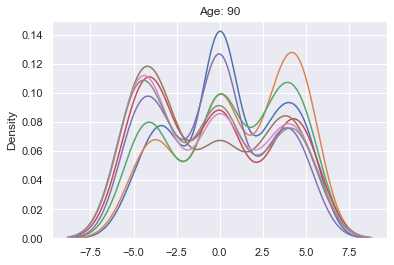

In [38]:
# show all age degree of correlation kdeplot
for age in relation_over_20.columns[2:10]:
    specified_age_list = countries_age_relativity(age)
    draw_kde_picture(specified_age_list,age)

Picture is very messy
Thus, I draw the picture of respeactive age group
We already know that age **50** is a watershed, so to make it easier to see, I've broken down ages 20 to 40 and 50 to 90 into two cells.

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

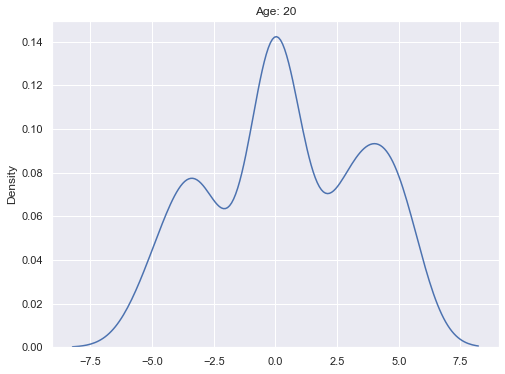

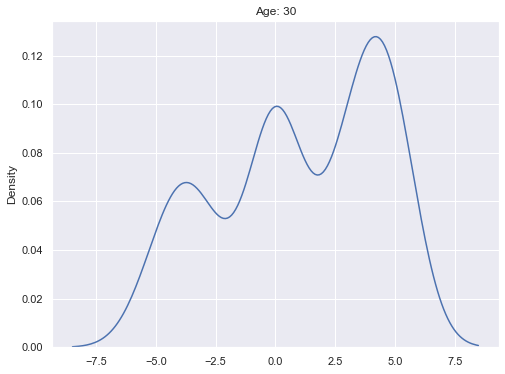

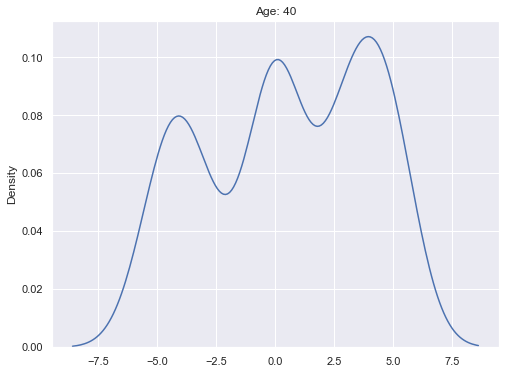

In [39]:
# 20 to 40
for age in relation_over_20.columns[2:5]:
    specified_age_list = countries_age_relativity(age)
    plt.figure (figsize= (8, 6)) # set figure size 
    draw_kde_picture(specified_age_list,age)

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

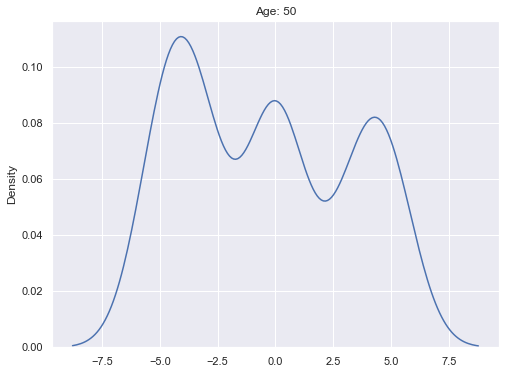

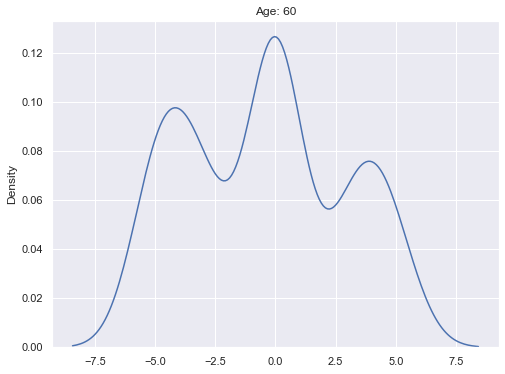

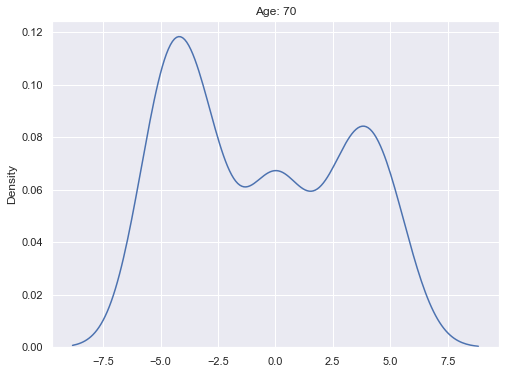

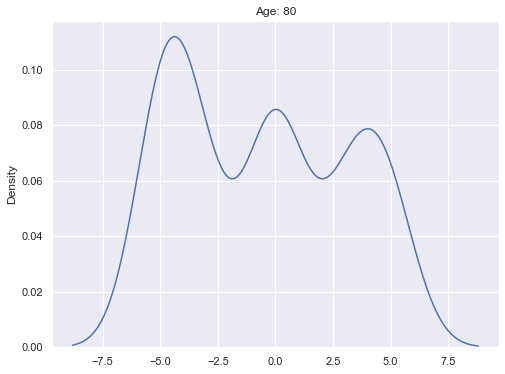

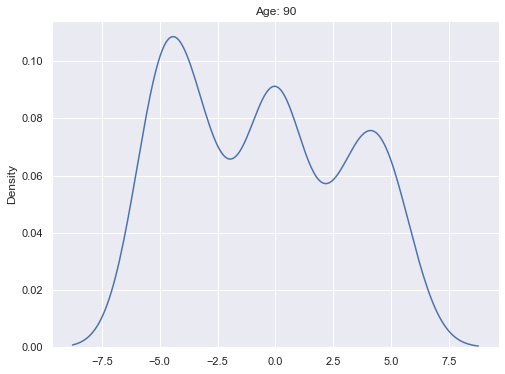

In [40]:
# 40 to 90
for age in relation_over_20.columns[5:10]:
    specified_age_list = countries_age_relativity(age)
    plt.figure (figsize= (8, 6)) # set figure size 
    draw_kde_picture(specified_age_list,age)

## conclusion：
    When the age is over 50, the negative effect of substances on the gender ratio of countries outweighs the positive effect. Below 50, approximately 25 percent of countries are negatively affected. Meanwhile, for any age group, almost all countries were negatively influenced by substances.
    Therefore, substances, including tobacco,alcohol, and drug, have an effect on gender ratio to some extent.